### Neural Networks

We have already studied the perceptron, which is a simple linear model.

$y = sgn({\bf w}^T {\bf x})$

Graphically:

![sp](simplePerceptron.png)

We can rapidly train perceptrons, but you do not have to look far to find datasets that the perceptron cannot fit. 

An example is the "XOR" of two linear half spaces.

![img](xor.png)


### Compositions

Perceptrons basically realize halfspaces.

They are functions of the form $h_w(x) = sgn(w^Tx)$.  

By taking compositions of functions of this form in clever ways we can create a new function that is satisfied exactly by the XOR region.

We start with the two halfspaces that are XORed.

![hs](halfspaces.png)

In the notation of boolean algebra,

$$f=h_1\bar{h_2}+\bar{h_1}h_2$$

Note: This discussion generalizes to any boolean combination of halfspaces

![ex](exercise7.1.png)

### Boolean logic

On the way to expressing $f$ in terms of $h_1$ and $h_2$, let's look at more basic boolean functions.

![oa](or_and.png)

### Towards a multilayer perceptron

We now know how to do the "+" part of $$f=h_1\bar{h_2}+\bar{h_1}h_2$$

![baby](babyMLP.png)

However $h_1\bar{h_2}$ and $\bar{h_1}{h_2}$ are ANDs.  

We know how to do ANDs!  And doing negations is not that hard either...

![un](unrolling.png)

### The whole MLP

Now if we write in the details for the halfspaces $h_1$ and $h_2$, we have the whole MLP...

![wt](completeMLP.png)


### An explicit function

This diagram is encoding a symbolic formulation that is made up of "compositions of perceptrons".

Note that if `sign` were differentiable then we could use gradient descent to fit this model.

![explicit](explicit.png)

### Universal Approximation Theorem

A three layer network can approximate any smooth function arbitrarily well.

![u](universal.png)

### Downside

Because the model is so expressive, overfitting is a problem.

If the network is too big you may not have enough data to get a good fit. 


### Training

How do you train a multilayer perceptron?

Consider the problem of training a simple perceptron.

$$h_w(x) = \theta(w^Tx)$$

where $\theta(z) = sign(z)$. 

This was not easy.  

The gradient of $sign(z)$ is zero where it is defined.

One approach is to use a differentiable $\theta(z)$ that is similar to $sign(z)$,

and then use gradient descent.

A common choice is $\theta(z) = \tanh(z)$.

![thetas](thetas.png)

### Hyperbolic tangent

It turns out that $\tanh(\alpha z)$ can become arbitrarily similar to $sign(z)$ by using large $\alpha$.

![ex](ex7.5.png)

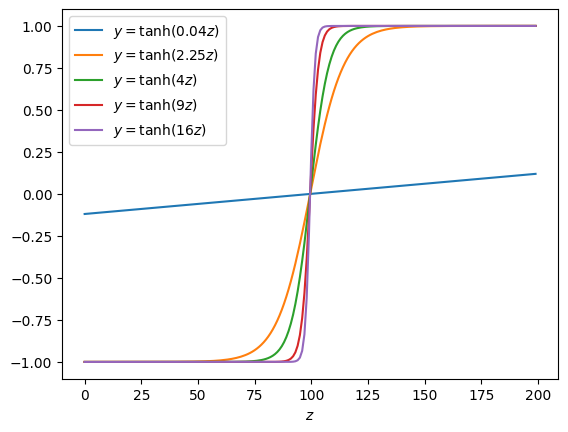

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,200)
for alpha in [a**2 for a in [0.2,1.5,2,3,4]]:
    plt.plot(np.tanh(alpha*x),label=r"$y=\tanh({}z)$".format(round(alpha,2)))
plt.xlabel(r"$z$")
plt.legend()
plt.show()

Emprically, error on a dataset for a simple perceptron tracks pretty well between $\tanh$ and $sign$.

![rb](blueRed.png)

### More on activations

Hyperbolic tangent also works well "analytically" because its derivative is simple:

$\frac{d}{dz}\tanh(z) = 1-\tanh^2(z)$

(derivation [here](https://socratic.org/questions/what-is-the-derivative-of-tanh-x))

This property makes gradient descent easier for neural nets with $\tanh$ activations.

Note that $\tanh$ is just a scaled and shifted version of the usual [logistic sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function.

Are there any fundamentally different activation functions in common use?

Yes.

In 2011 there was a blockbuster paper published by Xavier Glorot, Antoine Bordes and Yoshua Bengio called *Deep sparse rectifier neural networks*.

In this paper the authors showed that deeper networds could be trained effectively with an activation function called [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#cite_note-glorot2011-7).  

This is *one* of the discoveries that made the "deep learning" revolution possible.

The reason relu is an improvement is that it outperforms `tanh` on the [vanishing gradients problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

### Neural nets

![nnImg](neuralNet.png)

## Notation

Layers are indexed by $\ell = 0,1,2,\ldots,L$.

$\ell=0$ is the *input layer*.

$\ell=L$ is the *output layer*.

Every layer except $L$ has a *bias* node with no inputs.

The layers $0 < \ell < L$ are the *hidden layers*.

Each layer has dimension $d^{(\ell)}$ which means it has $d^{(\ell)} + 1$ nodes ($\ell \neq L$).

Often $d^{(L)}=1$ but not always.

![nitty](nittyGritty.png)

The output of node $i$ in layer $\ell -1$ is denoted $x_{i}^{(\ell-1)}$.

The weight of the connection from node $i$ in layer $\ell-1$ to node $j$ in layer $\ell$ is denoted $w^{(\ell)}_{ij}$.

The sum of all weighted inputs to node $j$ in layer $\ell$ is denoted $s^{(\ell)}_j$.

\begin{equation}
s^{(\ell)}_j = \sum_{i=0}^{d^{(\ell-1)}} w^{(\ell)}_{ij}x^{(\ell-1)}_i
\end{equation}

We denote the vector of all the inputs to nodes $1,2,\ldots,d^{(\ell)}$ in layer $\ell$ as ${\bf s}^{(\ell)}$.

We denote the output all all nodes $0,1,2,\ldots,d^{(\ell)}$ in layer $\ell$ as ${\bf x}^{(\ell)}$

Note that ${\bf x}^{(\ell)} \in \{1\}\times\mathbb{R}^{d^{(\ell)}}$, because of the bias node.

Let $W^{(\ell)}$ denote the $d^{(\ell-1)}+1 \times d^{(\ell)}$ dimensional matrix, with $i,j$ entry $w^{(\ell)}_{ij}$.

Observe

\begin{equation}
{\bf s}^{(\ell)} = (W^{(\ell)})^T{\bf x}^{(\ell-1)}
\end{equation}

We denote the collection of all network parameters as 

${\bf w} = [W^{(1)},W^{(2)},\ldots,W^{(L)}]$.

The whole network is denoted $h({\bf x};{\bf w})$.

The basic form of the network is determined by $[d^{(0)},d^{(1)},\ldots,d^{(\ell)}]$ which is called the *architecture* of the network. 

![ns](notationSummary.png)




### Forward Propagation

We will now study how information flows "forward" through the network.

For the moment we will not worry about how weights are found during training.

We will just work out the math of how the network turns inputs into outputs.

First look at how inputs to a layer become outputs:

\begin{equation}
{\bf x}^{\ell} =
\begin{bmatrix}
1 \\
\theta({\bf s}^{(\ell)})
\end{bmatrix}
\end{equation}


In [19]:
# example

import numpy as np

s = np.array([-1.5,2.1,-0.4,3.2])
theta = lambda z: np.tanh(z)
x = np.hstack(([1],theta(s)))
x

array([ 1.        , -0.90514825,  0.97045194, -0.37994896,  0.9966824 ])

Also, recall how *inputs* depend on the outputs of the previous layer...

\begin{equation}
{\bf s}^{(\ell)} = (W^{(\ell)})^T{\bf x}^{(\ell-1)}
\end{equation}


In [23]:
W = np.array([[1.2,1.4],[-1.3,2.0],[-4.1,-0.5]])
x = np.array([0.98,-0.77,0.03])
s = W.T@x
s

array([ 2.054, -0.183])

![chain](chain.png)



![fpimg](fp.png)

![imgfp](afterfp.png)

In [29]:
def numweights(arch):
    Q = 0
    for l in range(1,len(arch)):
        Q += arch[l]*(arch[l-1]+1)
    return Q

## Neural nets can have a lot of weights to fit...

numweights([10,20,10,1]),numweights([728]*30)


(441, 15390648)

![loss](loss.png)

### Training

We now address how neural nets can be trained so as to minimize the sample error.

The approach is basically gradient descent.

However computing the gradient of a neural network requires a lot of organization.

We start with the output node, which is the "outermost" function in the nn formula.

Then we work backwards layer by layer, applying the chain rule at each step.

This process is called **backpropagation**.

![img](backprop.png)

![img](pw.png)


### Subgoal

The above means that we can compute $\nabla E_{in}$ if we can compute $\nabla e_n$ for every $n$. 

Because computing $\nabla e_n$ is done the same way for every $n$, we will just call it $\nabla e$.

By definition,

$\nabla e = [\frac{\partial e}{\partial W^{(1)}},\frac{\partial e}{\partial W^{(2)}},\ldots,\frac{\partial e}{\partial W^{(L)}}]$.

### Subsubgoal

Now we have our work cut out for us:  

We need to compute $\frac{\partial e}{\partial W^{(\ell)}}$ for every $\ell$.

Now we proceed to solve this problem.

### Sensitivity

The *sensitivity* of layer $\ell$ is the gradient of the pointwise error $e({\bf w},y)$ with respect to the inputs to layer $\ell$. 

It is denoted

$$\delta^{(\ell)} = \frac{\partial e}{\partial {\bf s}^{(\ell)}}$$

Using the sensitivity vector for layer $\ell$, we can express the "layer $\ell$" part of the gradient of $e$:

$$\frac{\partial e}{\partial W^{(\ell)}} = {\bf x}^{(\ell-1)}(\delta^{\ell})^T$$

Proof:

![img](proof7.4.png)

### The gradient problem

Amazing progress:

We have reduced the problem of finding the gradient to the problem of computing the sensitivity vectors

 $[\delta^{(1)},\delta^{(2)},\ldots,\delta^{(L)}]$

But how do we compute those?

Well, it is actually easy to compute the last one.

![lo](last_one.png)


---

Now we need a recursive  way to express $\delta^{(\ell-1)}$ in terms of $\delta^{(\ell)}$, and we will be done.

![ad](alldone.png)

The following is a schematic for this recursive process.

![sc](schematic.png)


The formula is 

$$\delta^{(\ell)} = \theta'({\bf s}^{(\ell)}) \otimes \left [ W^{(\ell+1)}\delta^{(\ell+1)} \right ]_1^{d^{(\ell)}}$$

**proof**: See the notes

### Backpropagation

Now we are ready to summarize backpropagation...

![pbp](pseudoBP.png)


### Example

![expt1](expt1.png)

![expt2](expt2.png)

![expt3](expt3.png)

In [43]:
W_1 = np.array([[0.1,0.2],[0.3,0.4]])
W_2 = np.array([[0.2],[1],[-3]])
W_3 = np.array([[1],[2]])

theta = lambda z: np.tanh(z)
thetaPrime = lambda z: 1-np.tanh(z)**2

x_0 = np.array([1,2])

s_1 = W_1.T@x_0
s_1

array([0.7, 1. ])

In [44]:
x_1 = np.hstack(([1],theta(s_1)))
x_1

array([1.        , 0.60436778, 0.76159416])

In [45]:
s_2 = W_2.T@x_1
s_2

array([-1.48041469])

In [46]:
x_2 = np.hstack(([1],theta(s_2)))
x_2

array([ 1.        , -0.90154565])

In [47]:
s_3 = W_3.T@x_2
s_3

array([-0.80309131])

In [49]:
x_3 = theta(s_3)
x_3

array([-0.66576144])

In [50]:
delta_3 = 2*(x_3-1)*thetaPrime(s_3)
delta_3

array([-1.85486437])

In [51]:
delta_2 = thetaPrime(s_2)*(W_3@delta_3)[1:]
delta_2

array([-0.69451848])

In [52]:
delta_1 = thetaPrime(s_1)*(W_2@delta_2)[1:]
delta_1

array([-0.44083838,  0.87503983])

In [56]:
eDiffW1 = np.outer(x_0,delta_1.T)
eDiffW1

array([[-0.44083838,  0.87503983],
       [-0.88167675,  1.75007965]])

In [58]:
eDiffW2 = np.outer(x_1,delta_2.T)
eDiffW2

array([[-0.69451848],
       [-0.41974459],
       [-0.52894122]])

In [59]:
eDiffW3 = np.outer(x_2,delta_3.T)
eDiffW3

array([[-1.85486437],
       [ 1.67224491]])